In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = geopandas.datasets.get_path('naturalearth_lowres')
world_df = geopandas.read_file(path)

# Get people information

In [3]:
people_df = pd.read_csv("../data/people.csv", index_col=0)

In [4]:
people_df

,city,country,first-name,last-name,pronouns,country-alpha_3,continent,longitude,latitude,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
0sahene,Tamale,Ghana,Sitsofe,Morgah,He,GHA,Africa,-0.842399,9.405199,NaN,NaN,NaN,NaN,participant,NaN,NaN
0x174,Boston,United States,William,Jackson,He/Him,USA,North America,-71.060511,42.355433,NaN,NaN,participant,NaN,NaN,NaN,NaN
abdulelahsm,Dammam,Saudi Arabia,Abdulelah,Al Mesfer,he/him,SAU,Asia,50.103999,26.436782,NaN,NaN,participant,NaN,NaN,NaN,NaN
abraham-dabengwa,Johannesburg,South Africa,Abraham,Dabengwa,he/ him,ZAF,Africa,28.049722,-26.205000,NaN,NaN,NaN,NaN,participant,NaN,NaN
abretaud,Rennes,France,Anthony,Bretaudeau,He/him,FRA,Europe,-1.680020,48.111339,NaN,NaN,NaN,mentor,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rhoné-roux,NaN,NaN,Rhoné,Roux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,participant,NaN
sgsfak,NaN,NaN,Stelios,Sfakianakis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,participant,NaN,NaN,NaN,NaN
tallmar,NaN,NaN,Marta,Lloret Llinares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expert,NaN
umar-farouk-ahmad,NaN,NaN,Umar Farouk,Ahmad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,participant,NaN


# Locations

## Countries

Proportion of people without country information

In [5]:
people_df.country.isna().sum() / len(people_df.country)

0.052132701421800945

### Country repartition for all roles

In [6]:
countries = (people_df.groupby(['country']).count()
    .rename(columns = {'country-alpha_3': 'total'})
    .drop(columns = ['city','first-name','last-name','pronouns','continent','longitude','latitude']))
countries

,total,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
country,,,,,,,,
Argentina,13,0,2,2,4,8,3,1
Australia,8,1,5,4,2,1,1,0
Austria,1,0,1,0,0,0,0,0
Bangladesh,1,0,1,0,0,0,0,0
Belgium,2,0,0,2,0,0,0,0
Benin,1,0,0,0,0,1,0,0
Bolivia,0,0,0,0,0,5,0,0
Brazil,12,4,4,2,1,2,4,0
Cameroon,2,0,0,0,0,2,2,0


In [7]:
countries_perc = 100 * countries / countries.sum(axis = 0)
countries_perc

,total,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
country,,,,,,,,
Argentina,3.299492,0.000000,1.470588,1.470588,4.040404,6.060606,3.370787,20.0
Australia,2.030457,1.282051,3.676471,2.941176,2.020202,0.757576,1.123596,0.0
Austria,0.253807,0.000000,0.735294,0.000000,0.000000,0.000000,0.000000,0.0
Bangladesh,0.253807,0.000000,0.735294,0.000000,0.000000,0.000000,0.000000,0.0
Belgium,0.507614,0.000000,0.000000,1.470588,0.000000,0.000000,0.000000,0.0
Benin,0.253807,0.000000,0.000000,0.000000,0.000000,0.757576,0.000000,0.0
Bolivia,0.000000,0.000000,0.000000,0.000000,0.000000,3.787879,0.000000,0.0
Brazil,3.045685,5.128205,2.941176,1.470588,1.010101,1.515152,4.494382,0.0
Cameroon,0.507614,0.000000,0.000000,0.000000,0.000000,1.515152,2.247191,0.0


### Maps

In [8]:
country_code = (people_df.groupby(['country-alpha_3']).count()
    .rename(columns = {'country': 'total'})
    .drop(columns = ['city','first-name','last-name','pronouns','continent','longitude','latitude'])
    )
country_code = 100 * country_code / country_code.sum(axis = 0)
country_code = (country_code
    .rename_axis("iso_a3")
    .reset_index())
country_code.head()

,iso_a3,total,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
0,ARG,3.299492,0.000000,1.470588,1.470588,4.040404,6.349206,3.409091,20.0
1,AUS,2.030457,1.282051,3.676471,2.941176,2.020202,0.793651,1.136364,0.0
2,AUT,0.253807,0.000000,0.735294,0.000000,0.000000,0.000000,0.000000,0.0
3,BEL,0.507614,0.000000,0.000000,1.470588,0.000000,0.000000,0.000000,0.0
4,BEN,0.253807,0.000000,0.000000,0.000000,0.000000,0.793651,0.000000,0.0


In [30]:
country_world = pd.merge(world_df,country_code,on='iso_a3', how='outer')
country_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,total,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3.553299,5.128205,7.352941,2.205882,1.010101,2.380952,1.136364,0.0
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",11.675127,20.512821,10.294118,9.558824,18.181818,7.936508,5.681818,0.0


In [31]:
country_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,total,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3.553299,5.128205,7.352941,2.205882,1.010101,2.380952,1.136364,0.0
4,328239523.0,North America,United States of America,USA,21433226.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",11.675127,20.512821,10.294118,9.558824,18.181818,7.936508,5.681818,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,622137.0,Europe,Montenegro,MNE,5542.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1794248.0,Europe,Kosovo,-99,7926.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,11062113.0,Africa,S. Sudan,SSD,11998.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'People over all cohorts and all roles')

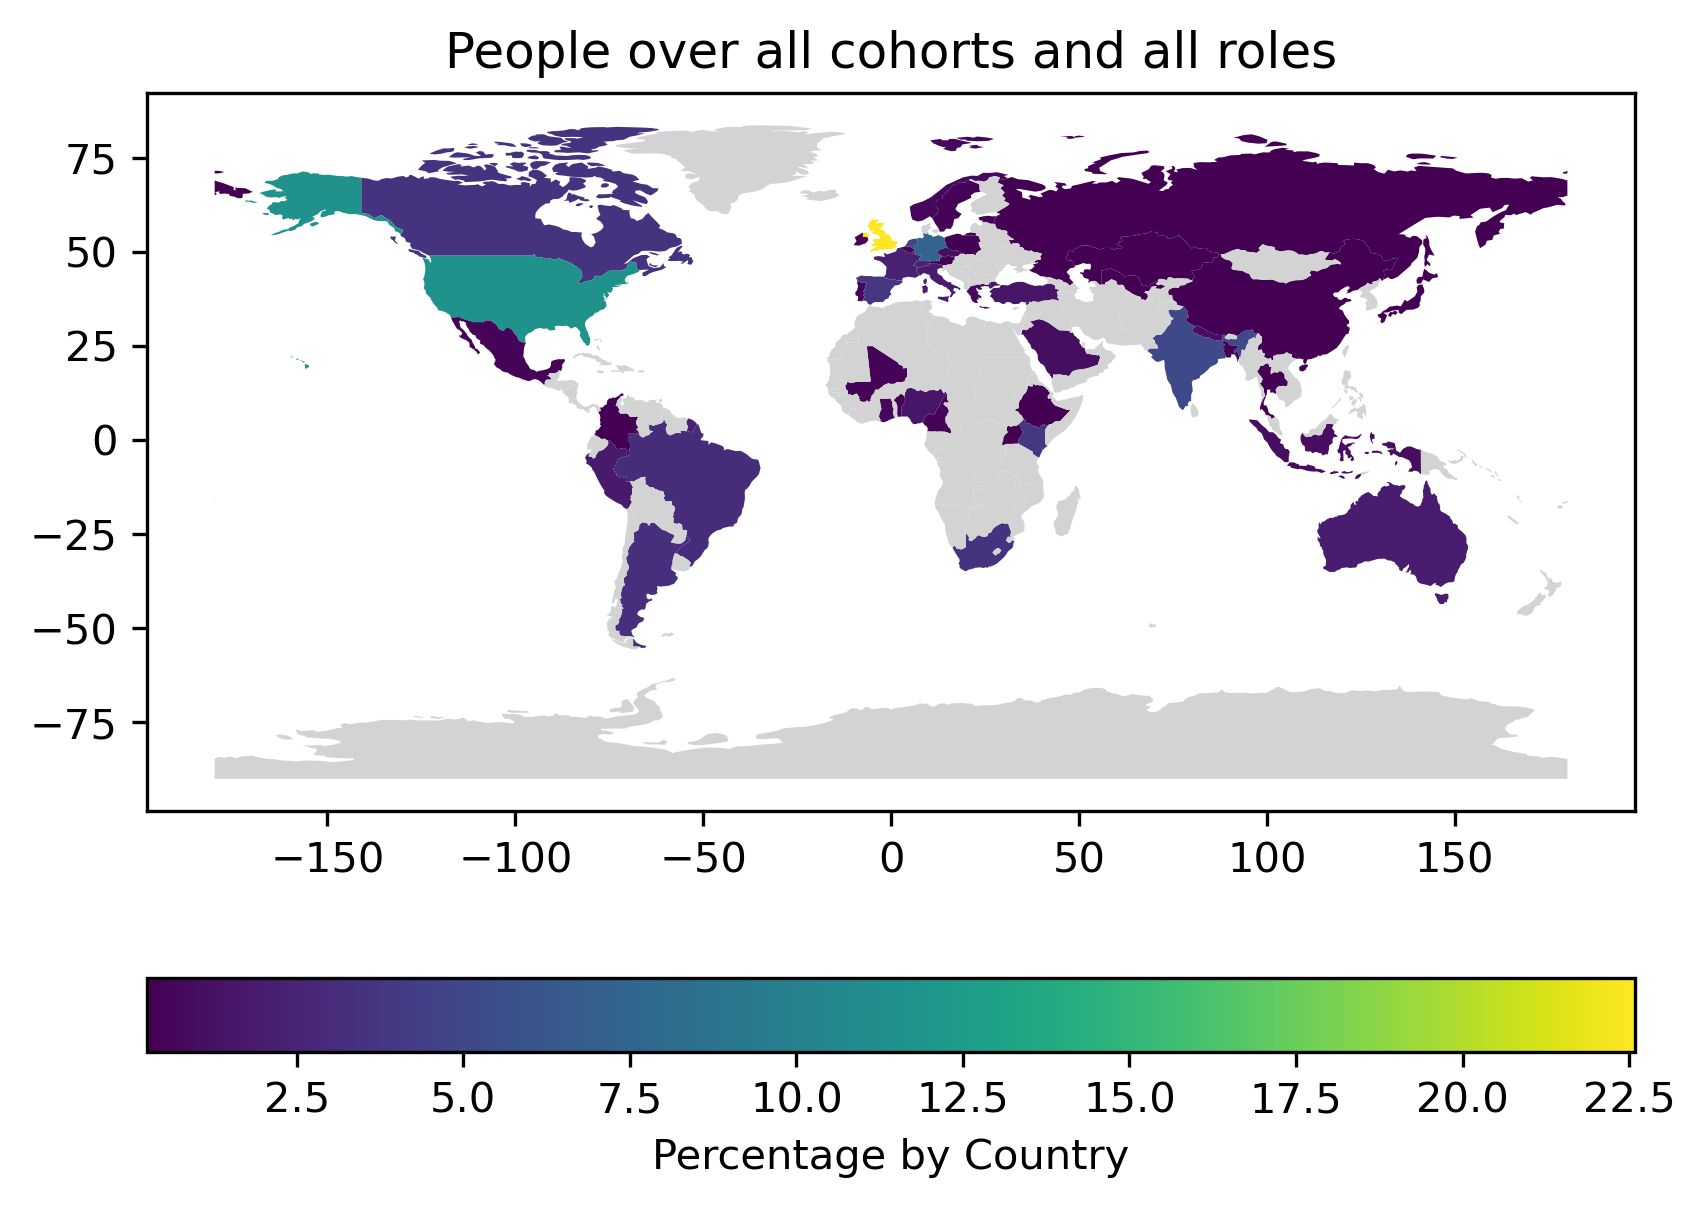

In [34]:
fig, ax = plt.subplots()
fig.set_dpi(300)

country_world.plot(
    column='total',
    ax=ax,
    legend=True,
    missing_kwds={"color": "lightgrey"},
    legend_kwds={'label': "Percentage by Country", 'orientation': "horizontal"})
plt.title('All cohorts / All roles')

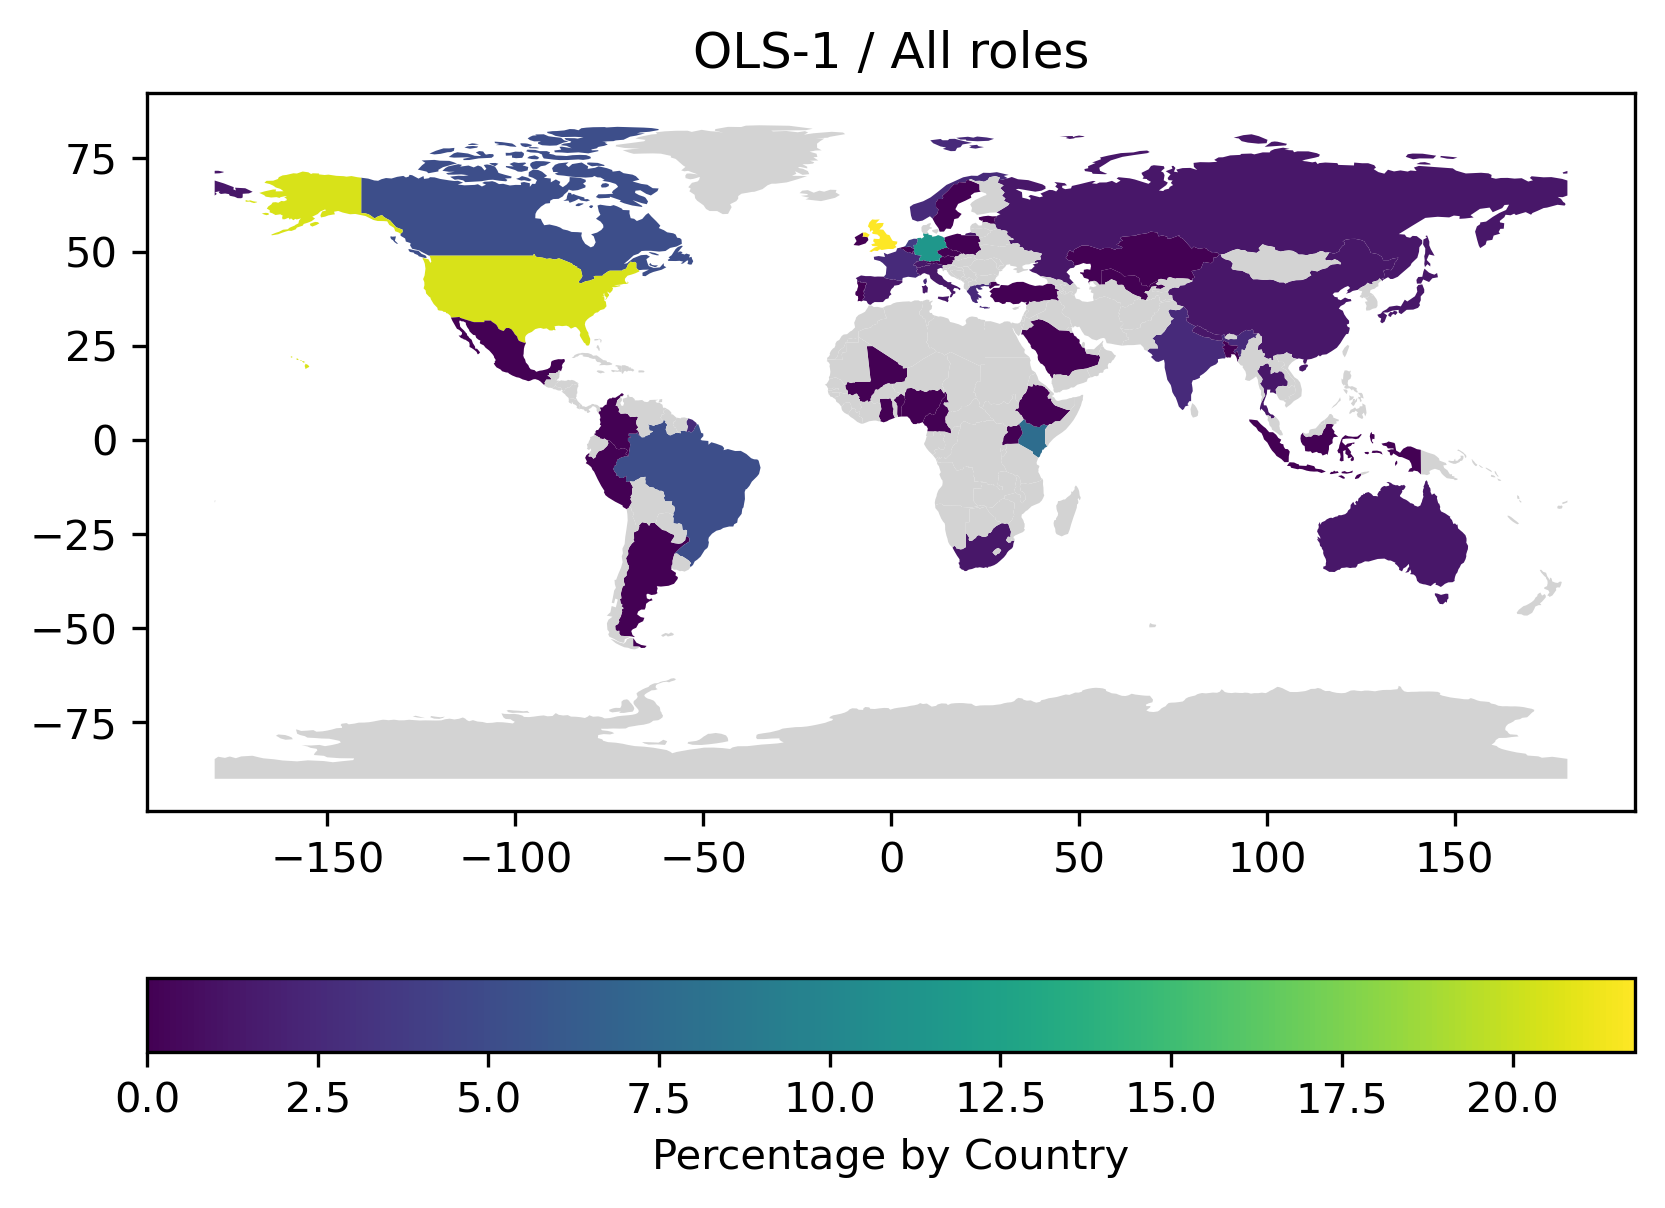

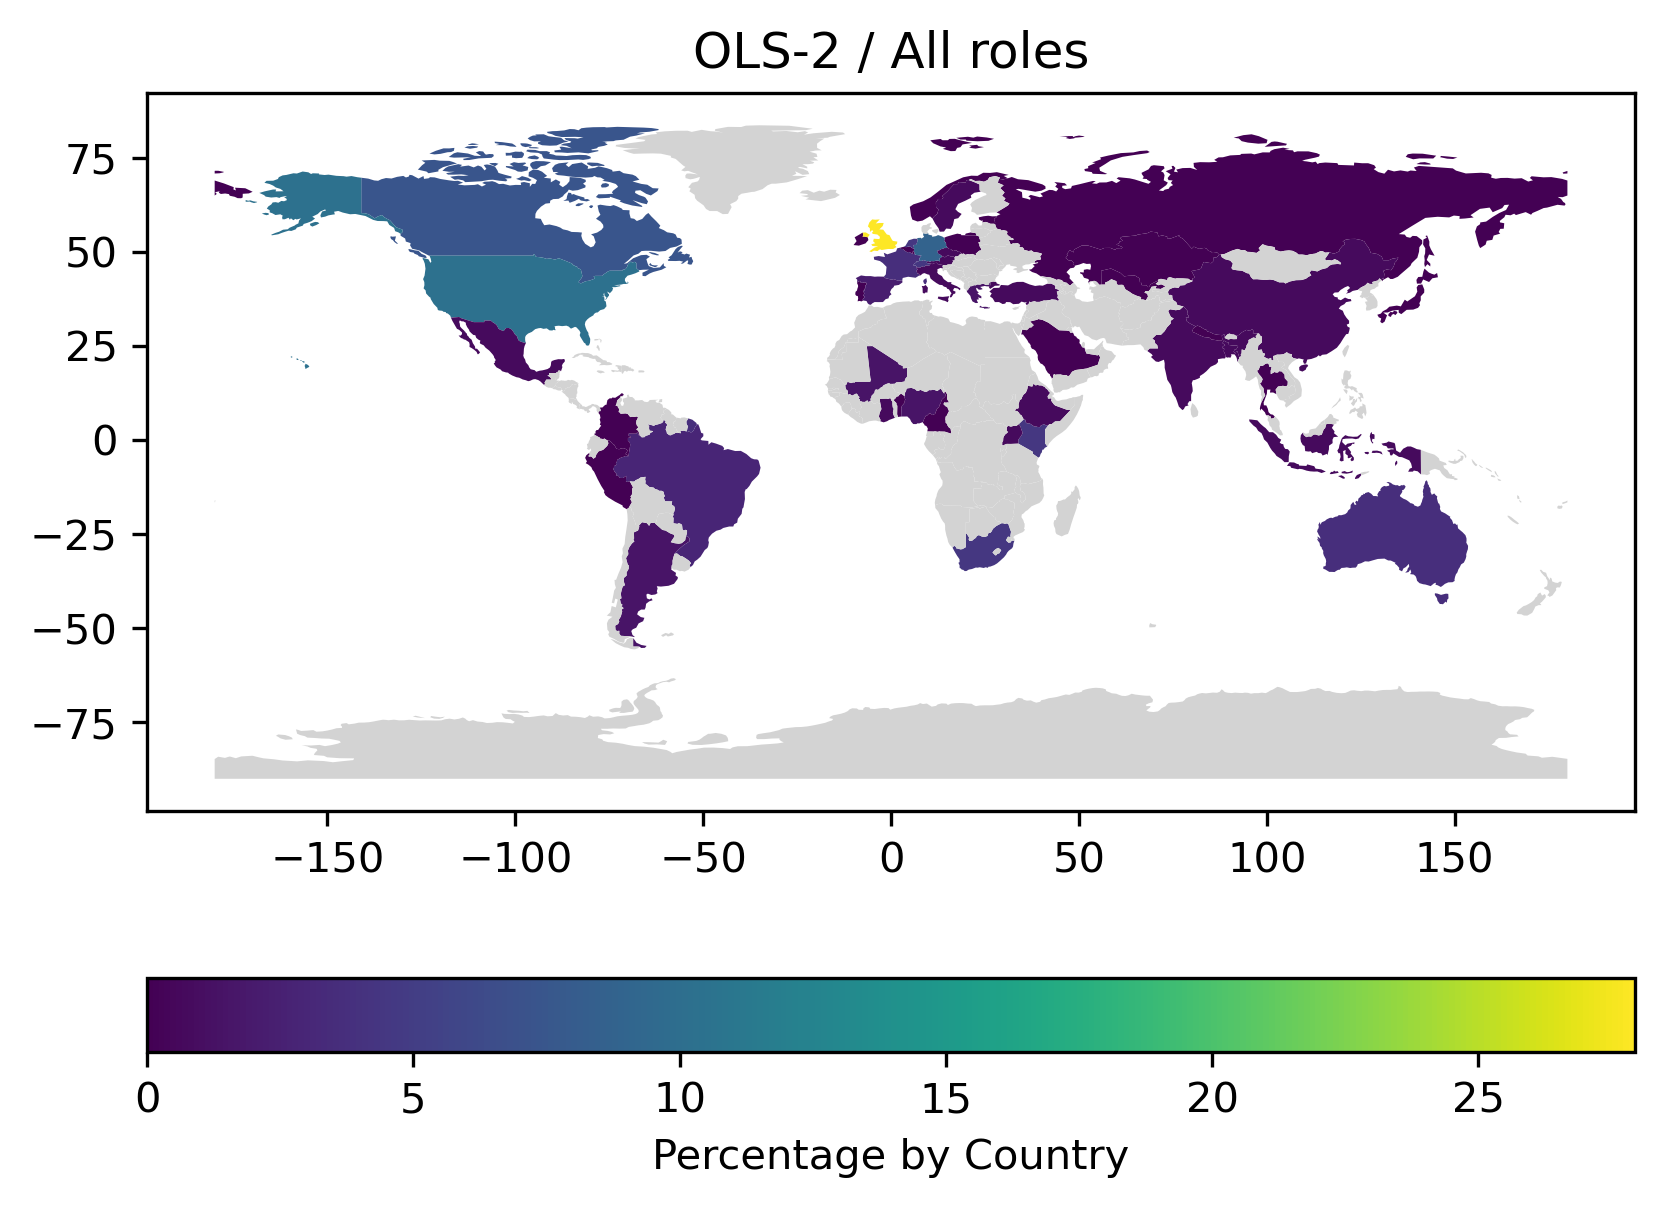

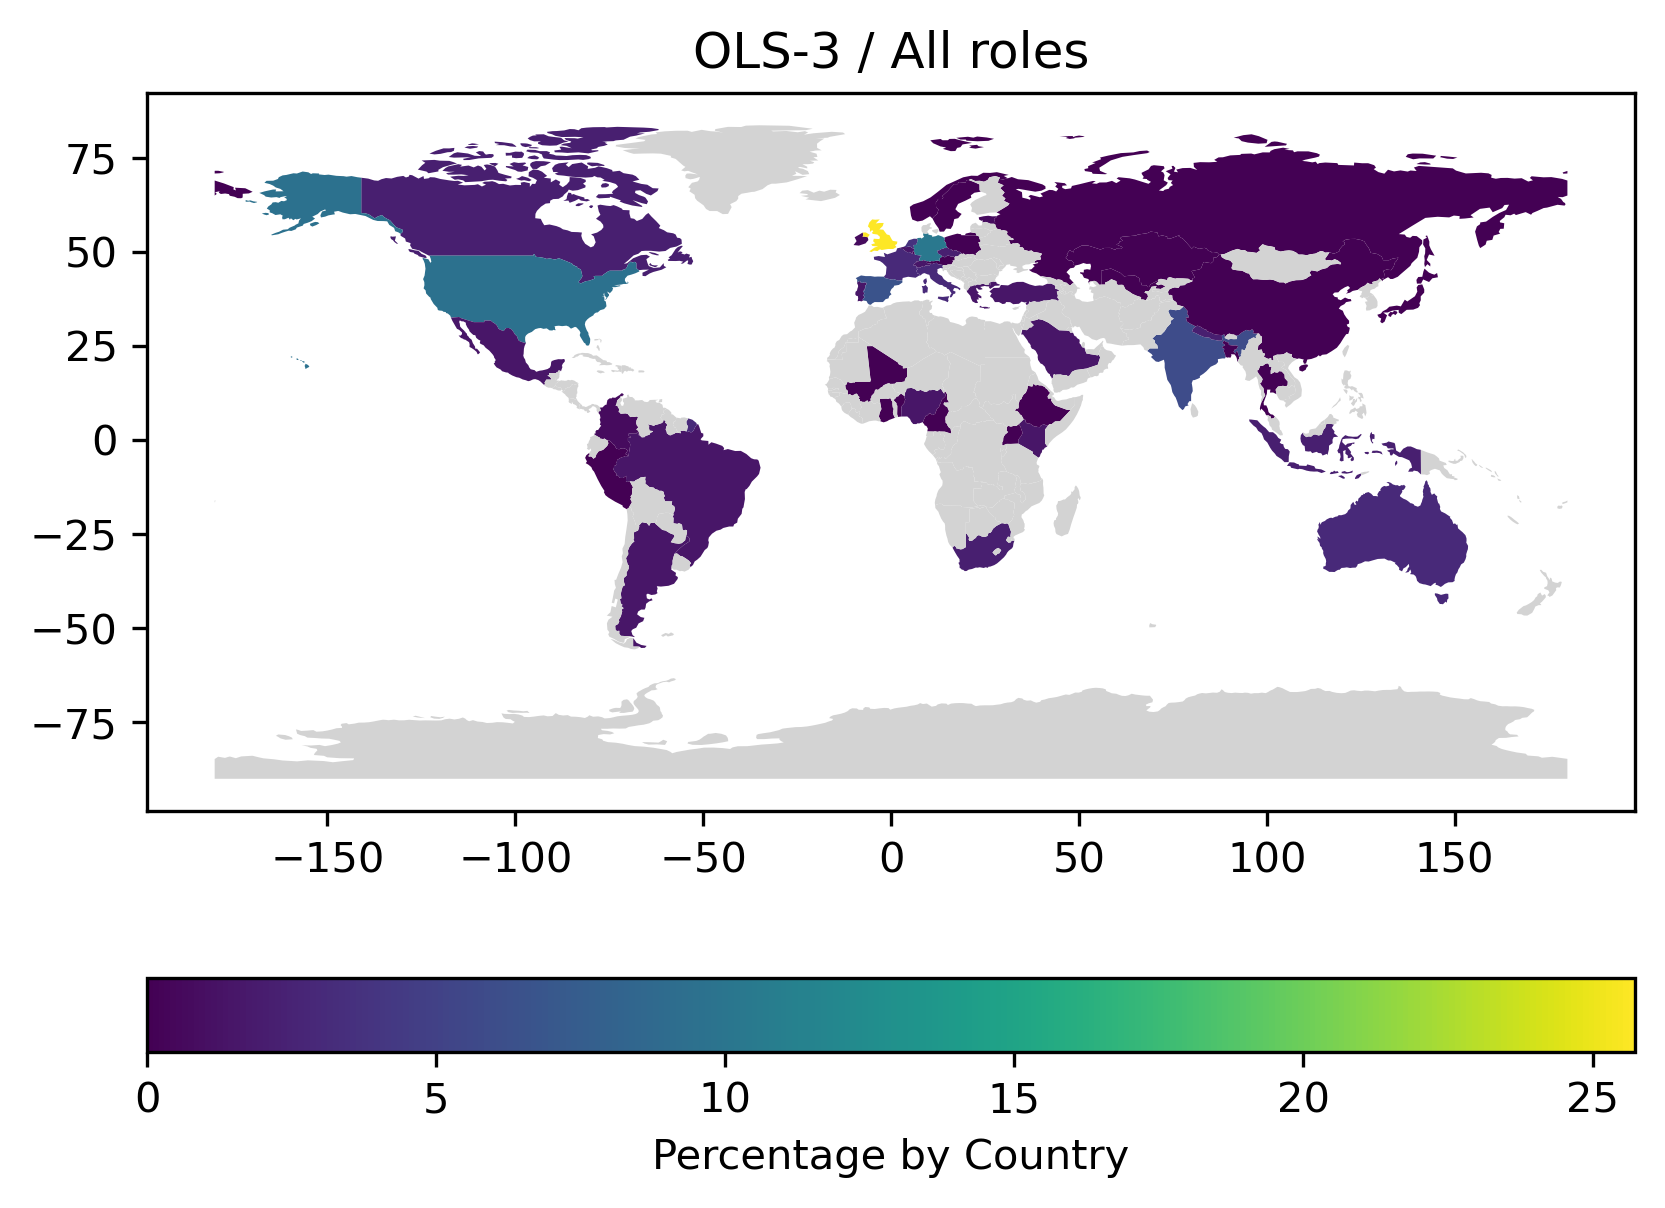

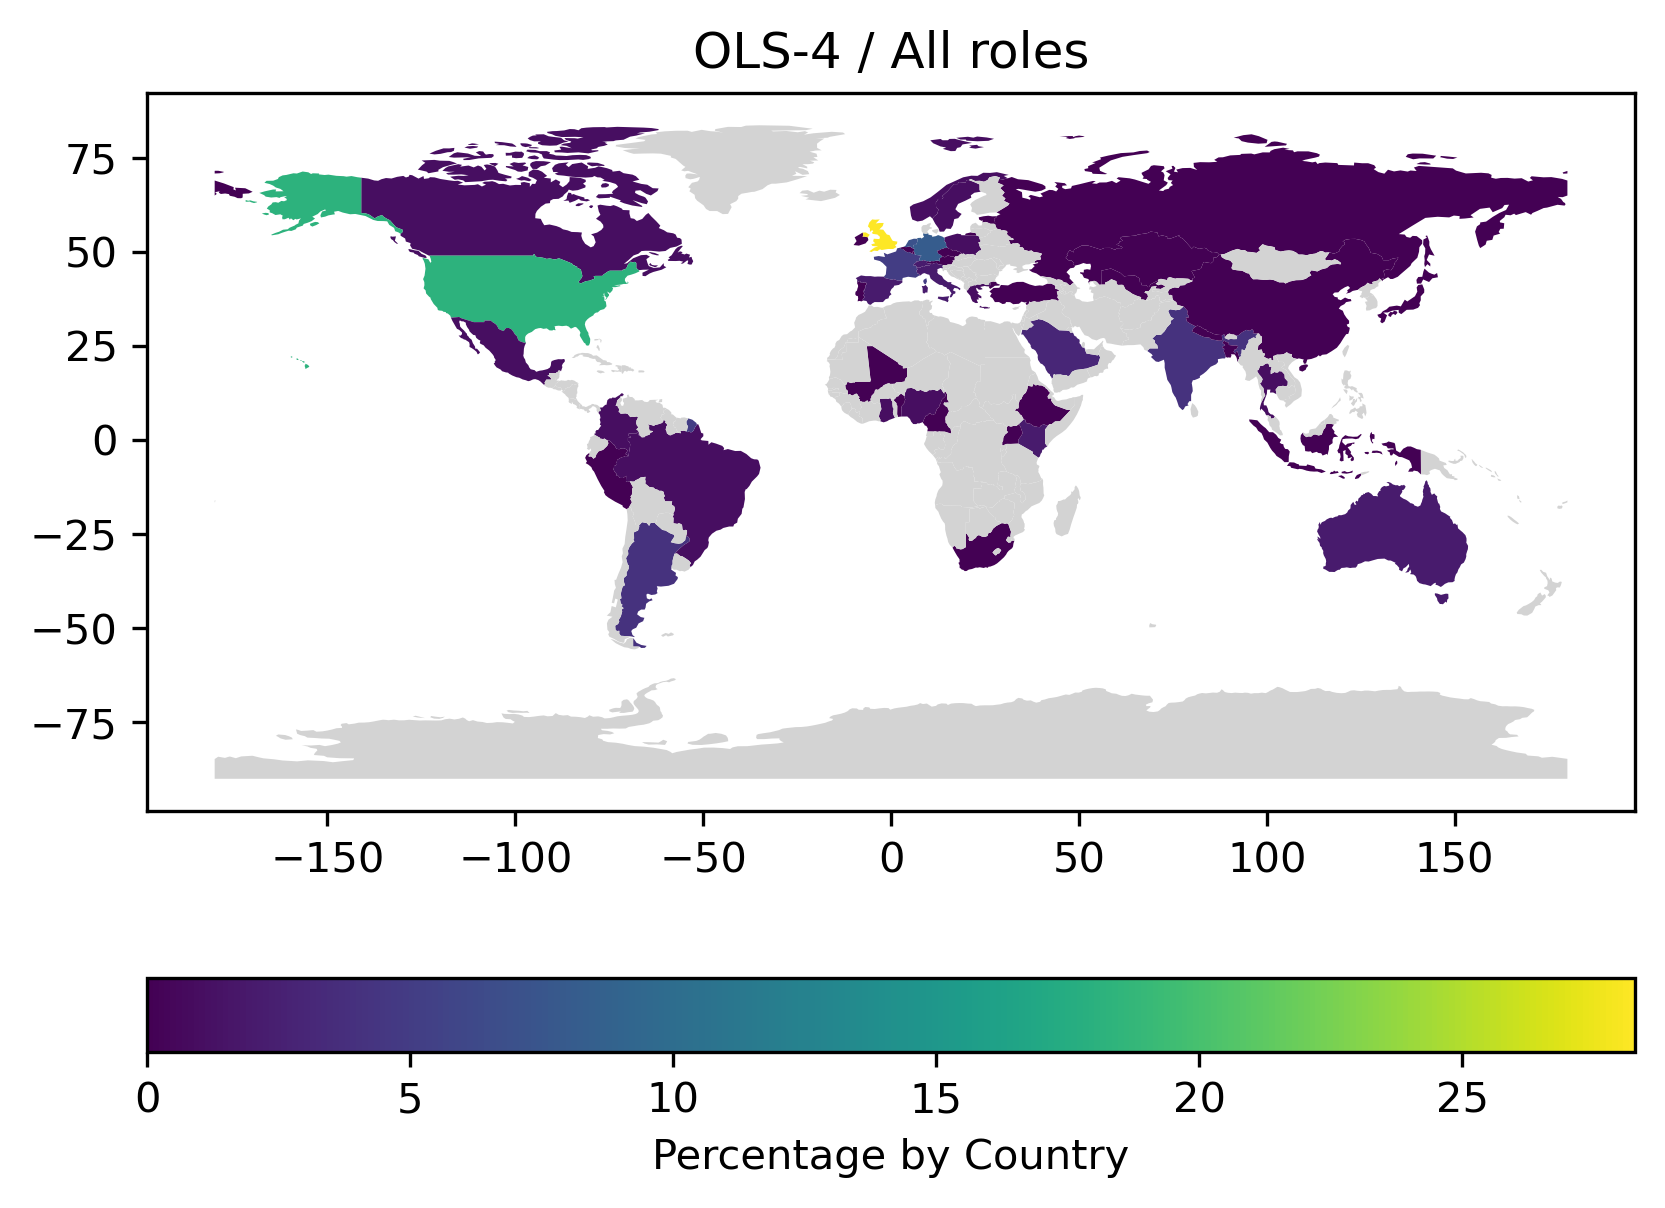

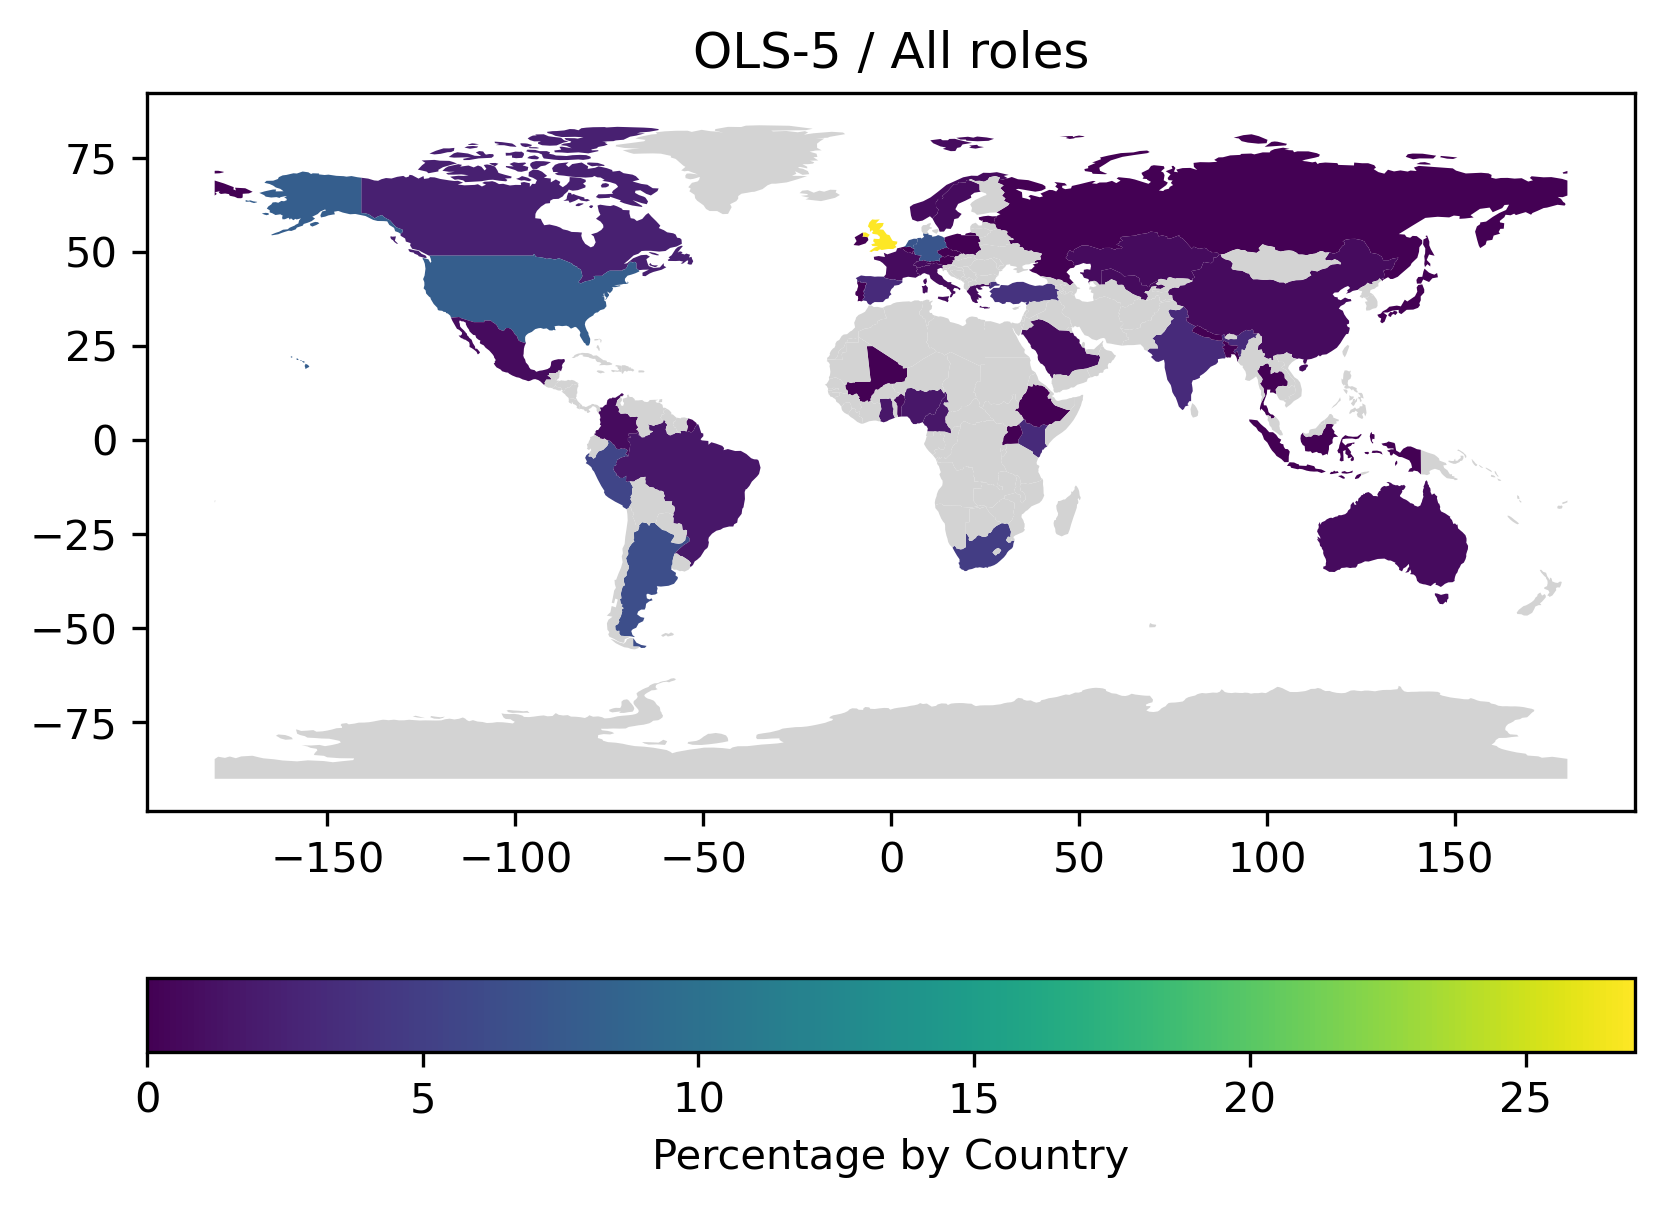

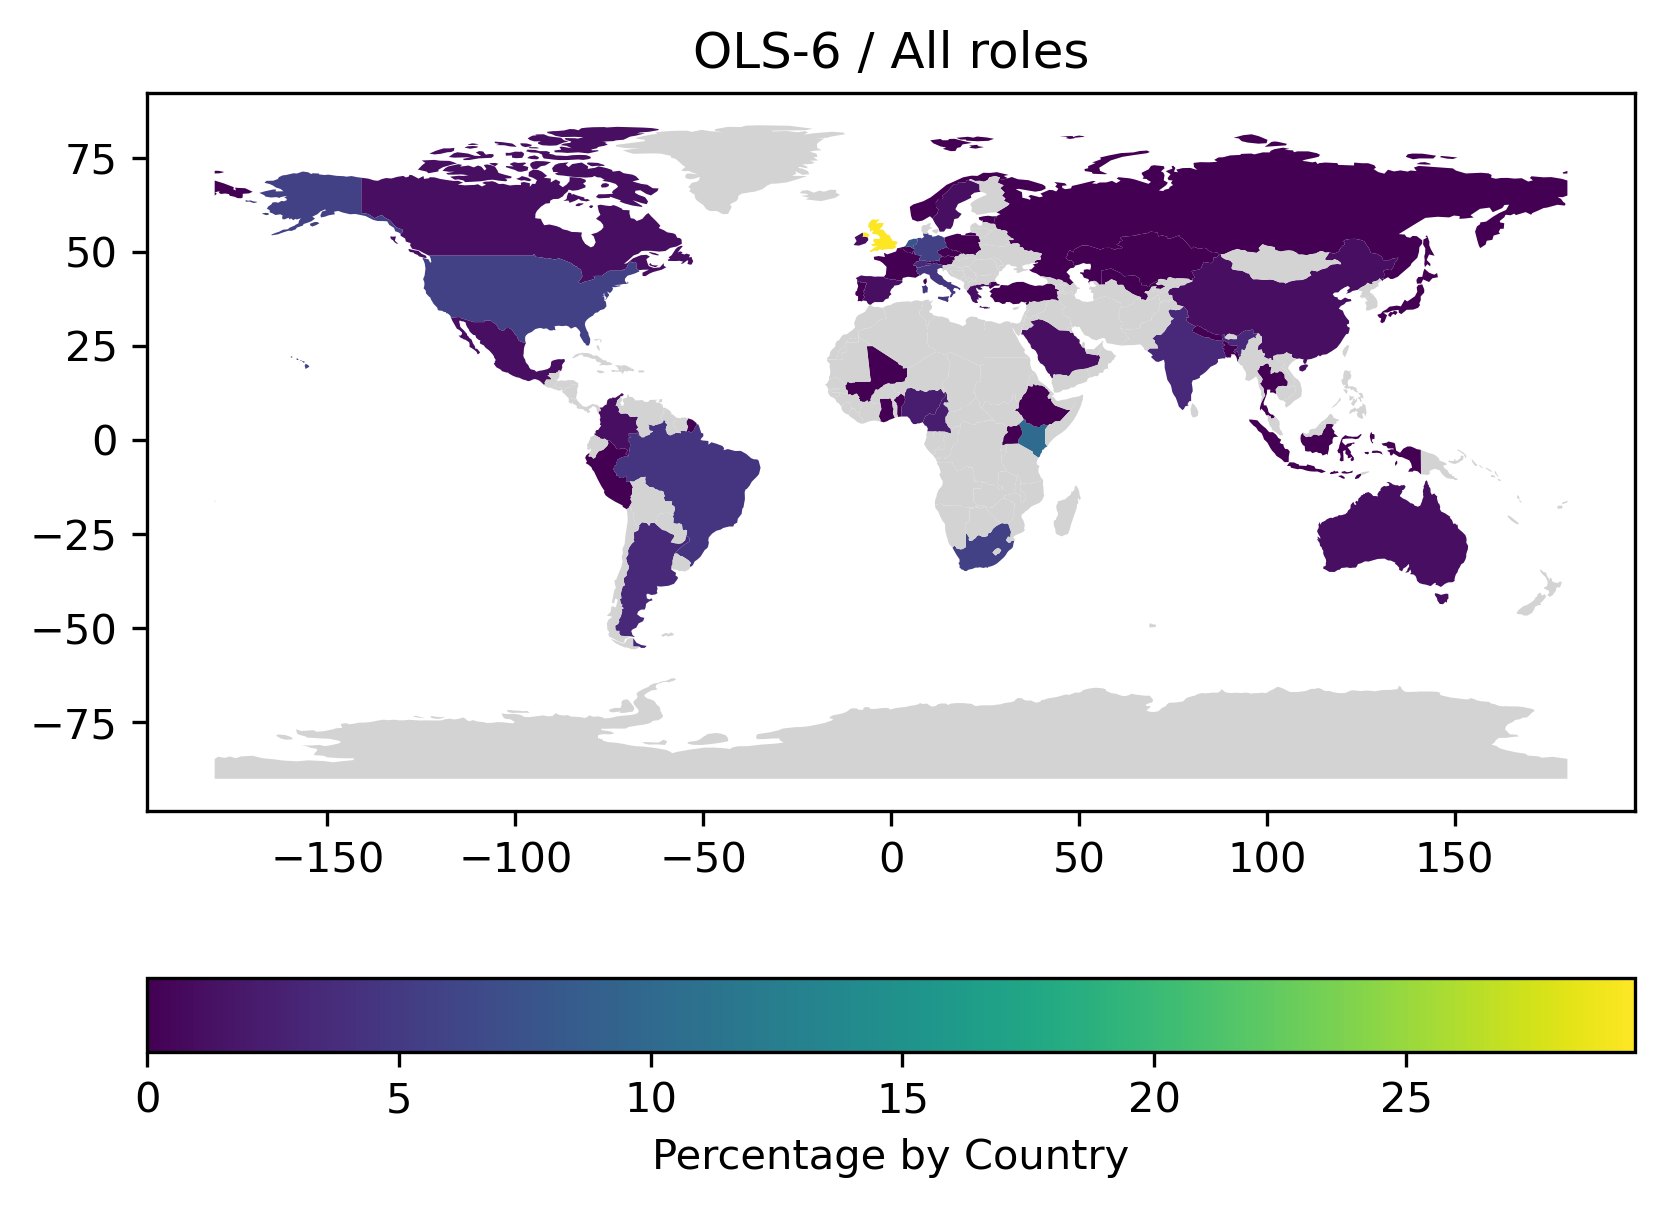

In [35]:
for i in range(1,7):
    fig, ax = plt.subplots()
    fig.set_dpi(300)

    country_world.plot(
        column=f'ols-{i}',
        ax=ax,
        legend=True,
        missing_kwds={"color": "lightgrey"},
        legend_kwds={'label': "Percentage by Country", 'orientation': "horizontal"})
    plt.title(f'OLS-{i} / All roles')

## Continents

Proportion of people without continent information

In [11]:
people_df.continent.isna().sum() / len(people_df.continent)

0.06635071090047394

### Continent repartition for all roles

In [12]:
continents = (people_df.groupby(['continent']).count()
    .rename(columns = {'country-alpha_3': 'total'})
    .drop(columns = ['city','first-name','last-name','pronouns','country','longitude','latitude']))
continents

,total,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
continent,,,,,,,,
Africa,45,7,19,7,4,17,18,0
Asia,45,6,5,18,9,14,5,0
Europe,201,40,76,84,58,62,49,4
North America,62,20,25,18,20,14,7,0
Oceania,8,1,5,4,2,1,1,0
South America,33,4,6,5,6,18,8,1


In [13]:
continents_perc = 100 * continents / continents.sum(axis = 0)
continents_perc

,total,ols-1,ols-2,ols-3,ols-4,ols-5,ols-6,ols-7
continent,,,,,,,,
Africa,11.421320,8.974359,13.970588,5.147059,4.040404,13.492063,20.454545,0.0
Asia,11.421320,7.692308,3.676471,13.235294,9.090909,11.111111,5.681818,0.0
Europe,51.015228,51.282051,55.882353,61.764706,58.585859,49.206349,55.681818,80.0
North America,15.736041,25.641026,18.382353,13.235294,20.202020,11.111111,7.954545,0.0
Oceania,2.030457,1.282051,3.676471,2.941176,2.020202,0.793651,1.136364,0.0
South America,8.375635,5.128205,4.411765,3.676471,6.060606,14.285714,9.090909,20.0


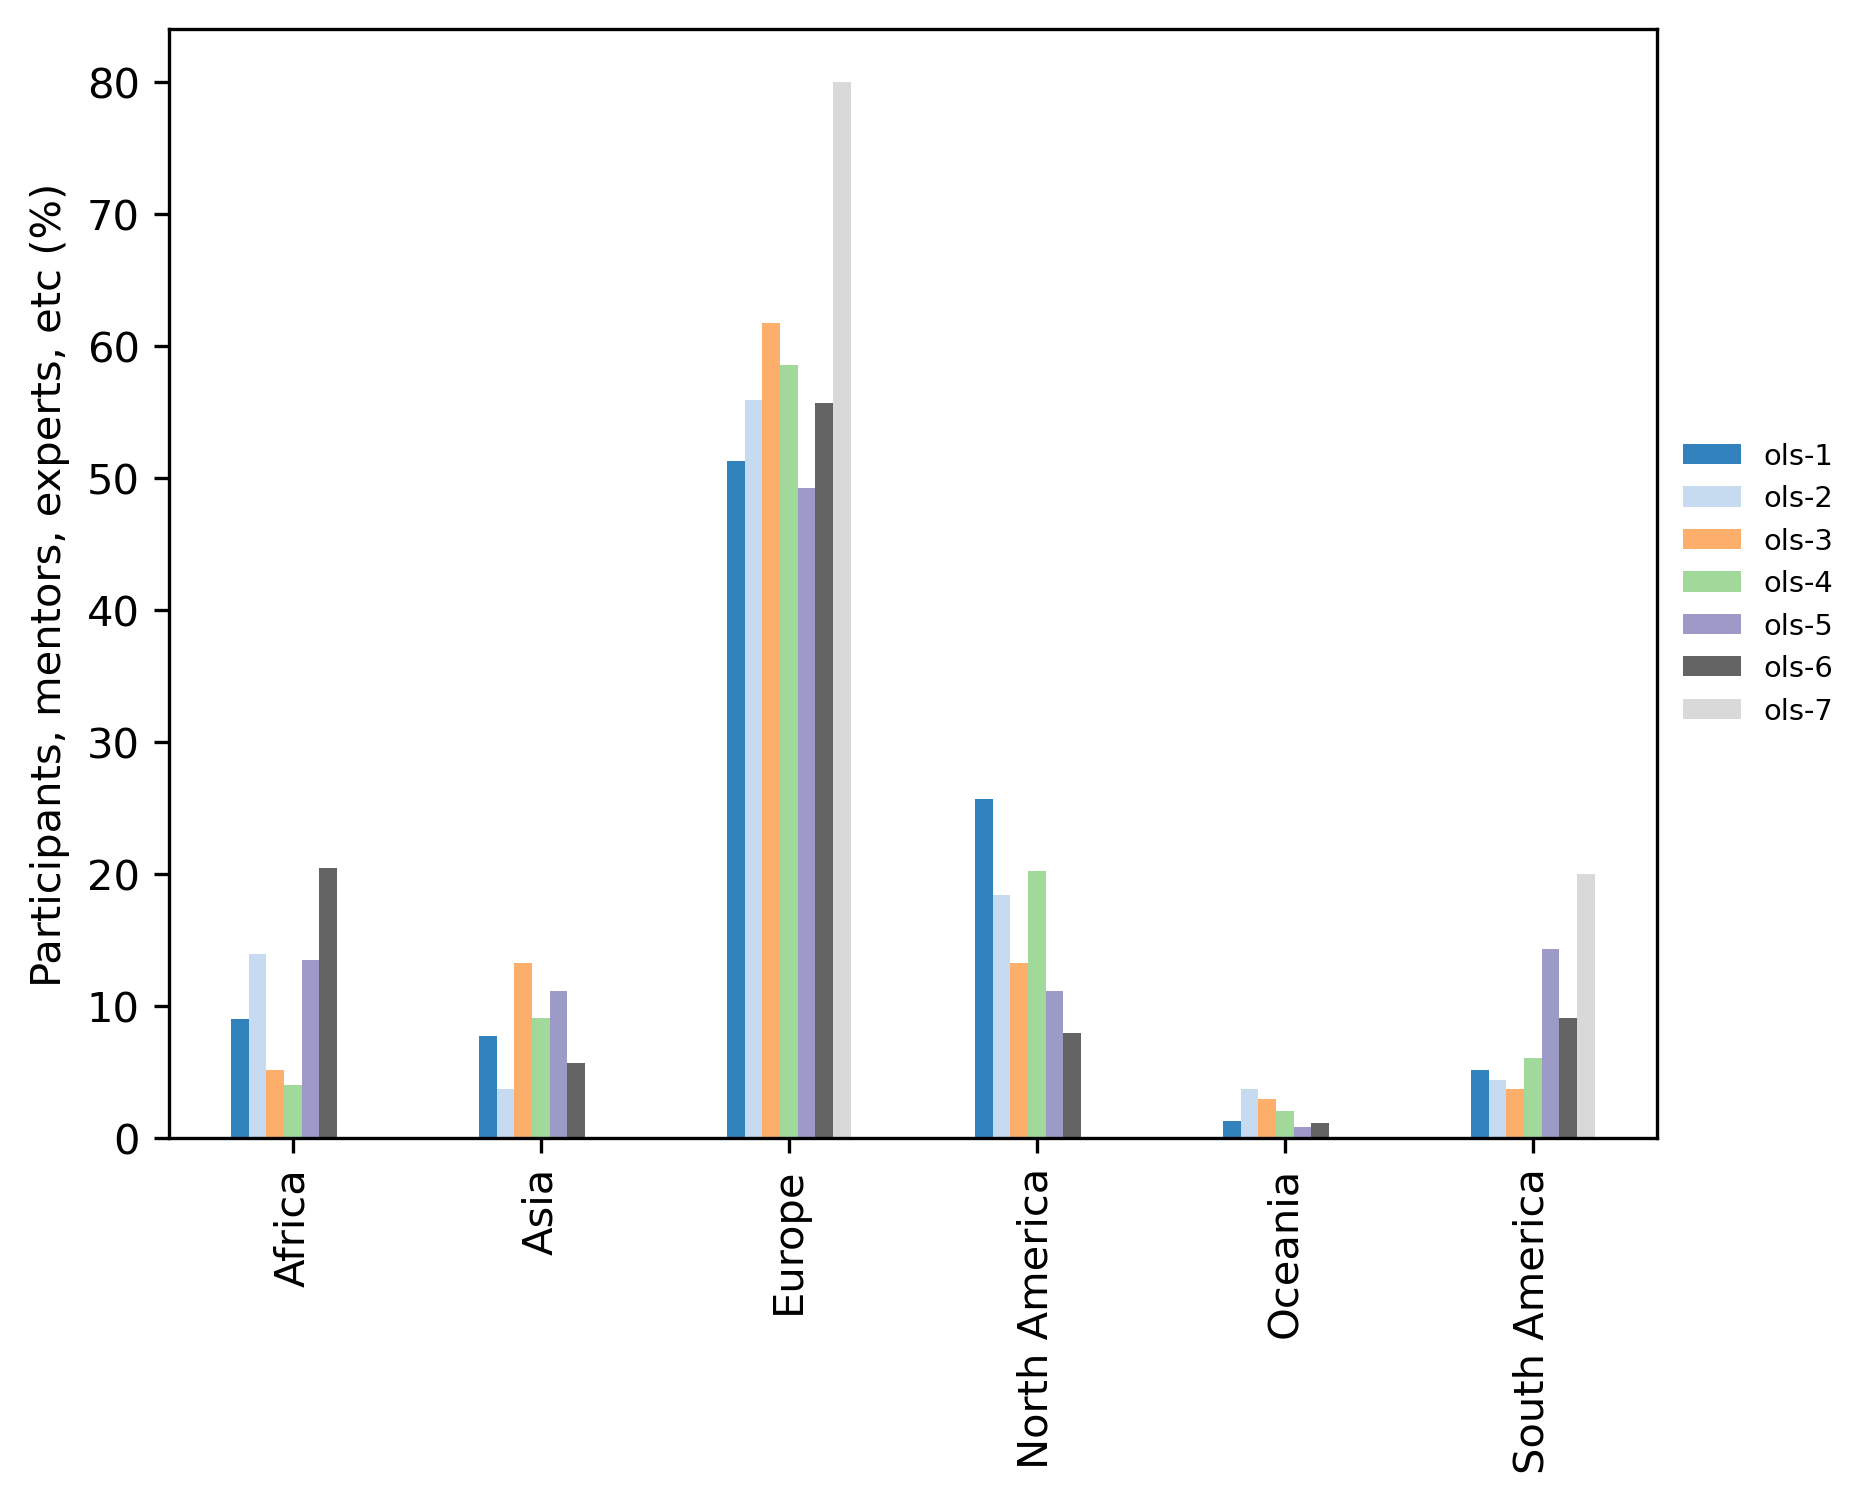

In [14]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continents_perc
     .drop(columns=['total'])
     .plot.bar(ax=ax, colormap='tab20c'))
plt.xlabel('')
plt.ylabel('Participants, mentors, experts, etc (%)')
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize='x-small')

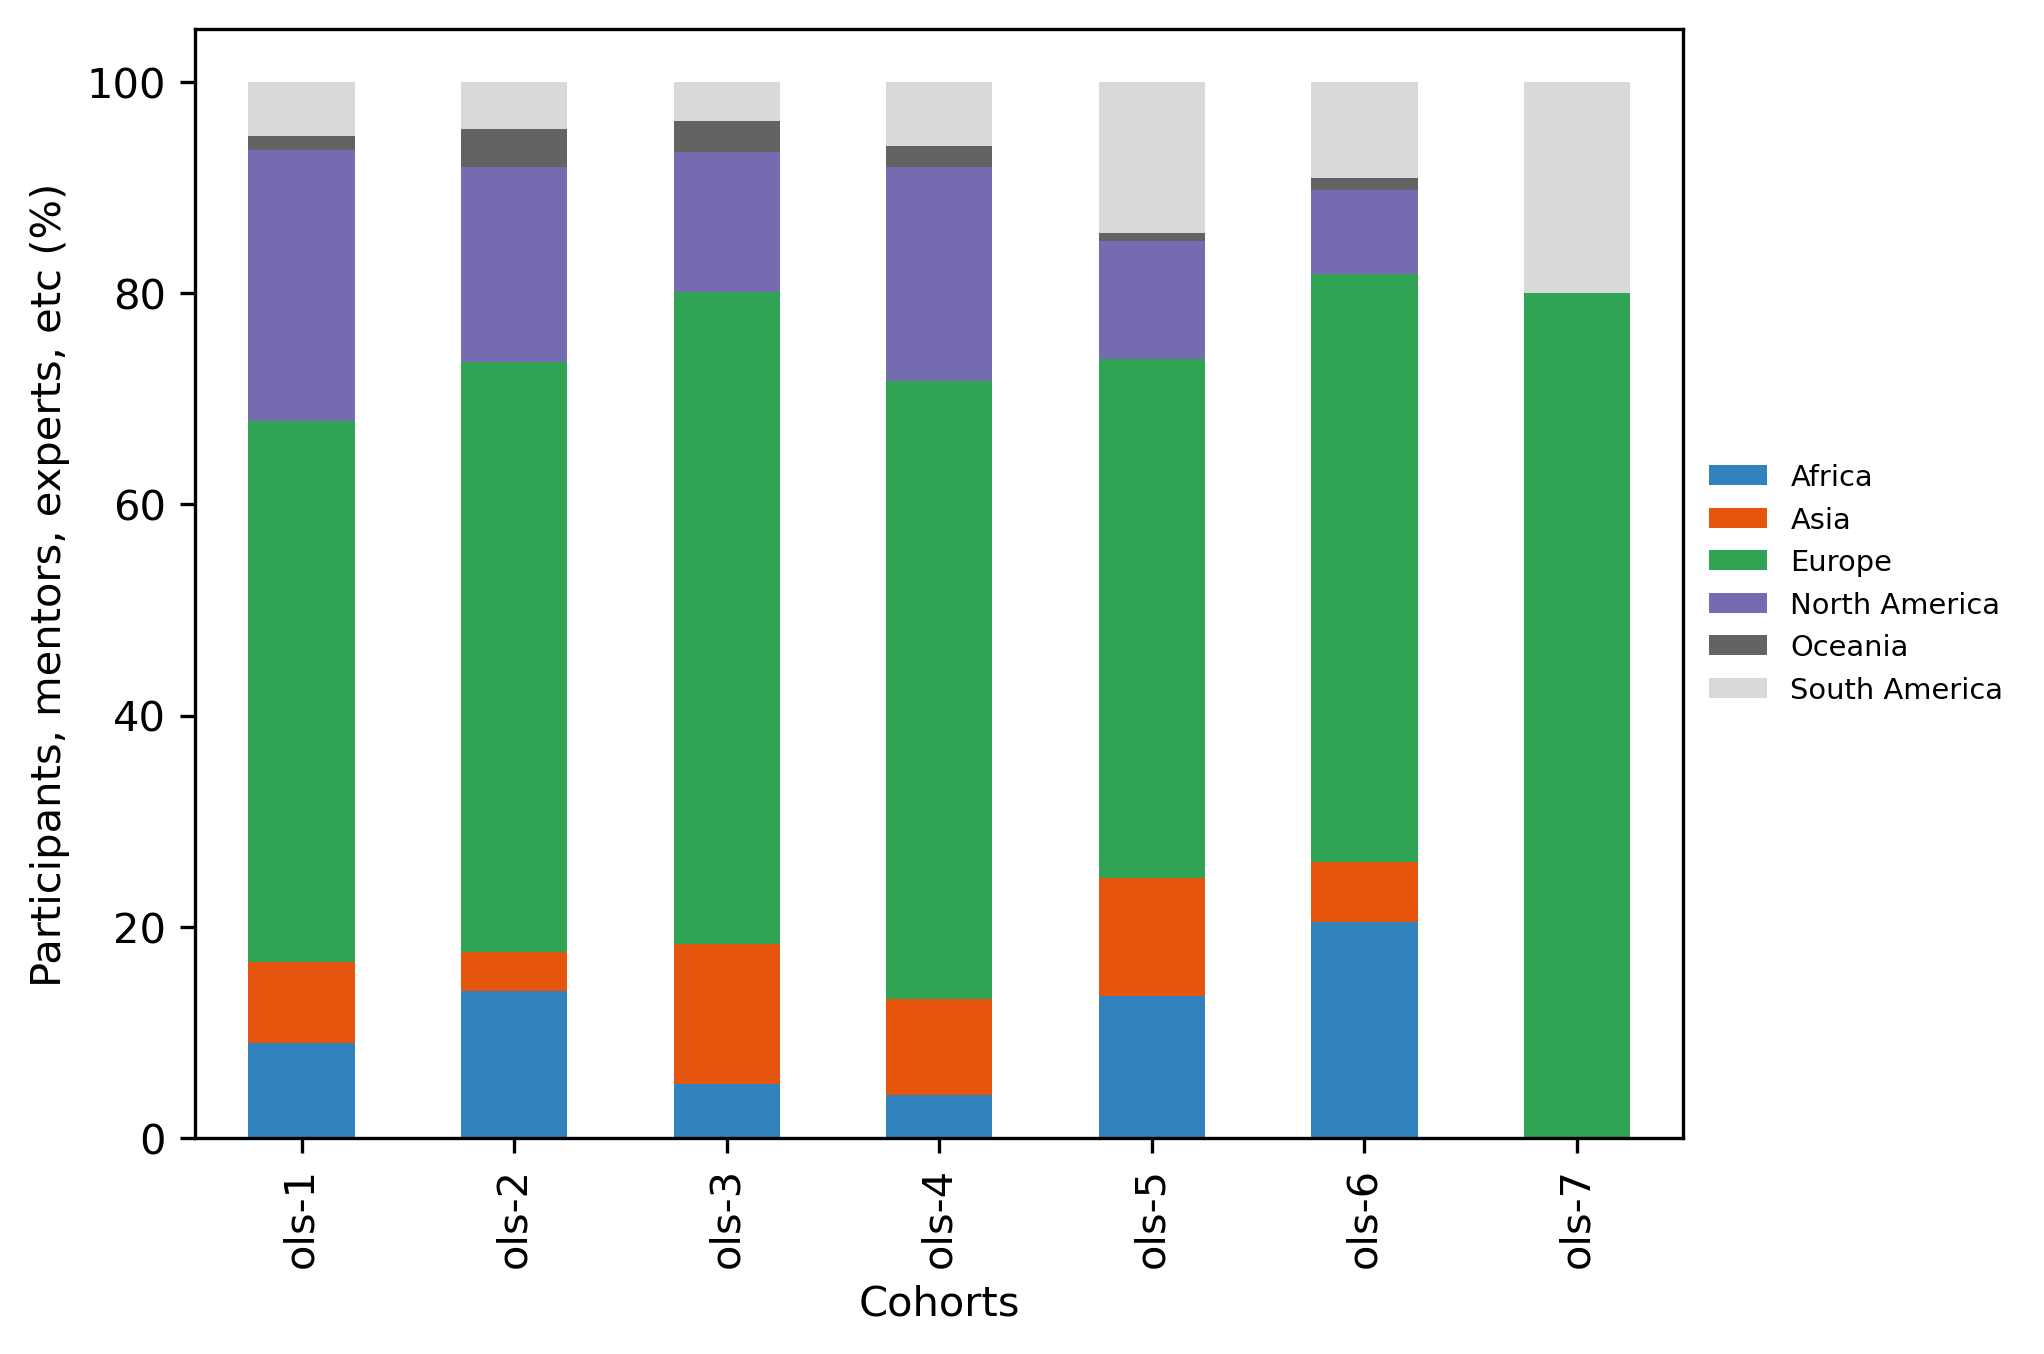

In [15]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(continents_perc
     .drop(columns=['total'])
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('Participants, mentors, experts, etc (%)')
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize='x-small')